### 1. Import Libraries

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 2. Getting insights from the Data-Set

In [137]:
data = pd.read_csv('D:\D drive\Projects\DSML PRO\Customer-Churn-Analysis\customer_churn_2.csv')

In [138]:
data['Churn'].value_counts()

Churn
No     161
Yes    139
Name: count, dtype: int64

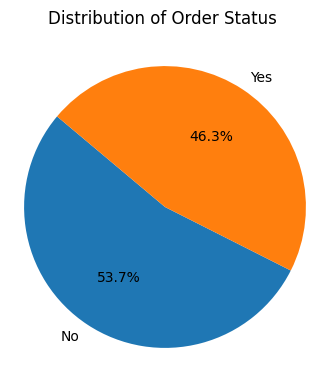

In [139]:
plt.figure(figsize=(4,4))
output_counts = data['Churn'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')

plt.show()

In [140]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

In [142]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,300.000000,300.000000,300.000000,300.000000
mean,0.543333,35.783333,67.226800,2477.975767
std,0.498951,21.113400,28.638073,1918.540111
min,0.000000,1.000000,18.450000,30.030000
25%,0.000000,17.000000,42.337500,910.302500
50%,1.000000,36.000000,68.635000,2072.400000
75%,1.000000,53.250000,92.430000,3618.405000
max,1.000000,72.000000,118.640000,8318.880000


In [143]:
#Percentage of missing values in the dataset
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


label Encoding for the categorical values now

In [144]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                    'PaymentMethod', 'Churn']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Print the first few rows to check
print(data.head())

  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0001-XXXX       1              0        1           1       5   
1  0002-XXXX       0              0        0           0      42   
2  0003-XXXX       1              0        0           0      61   
3  0004-XXXX       1              1        0           1      22   
4  0005-XXXX       1              1        1           1      21   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              2                2               0  ...   
1             1              1                0               2  ...   
2             1              1                2               0  ...   
3             1              0                2               1  ...   
4             0              0                0               0  ...   

  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                0            0            0                1         0   
1       

### 3. Exploratory Data Analysis

Box plot for numerical features:


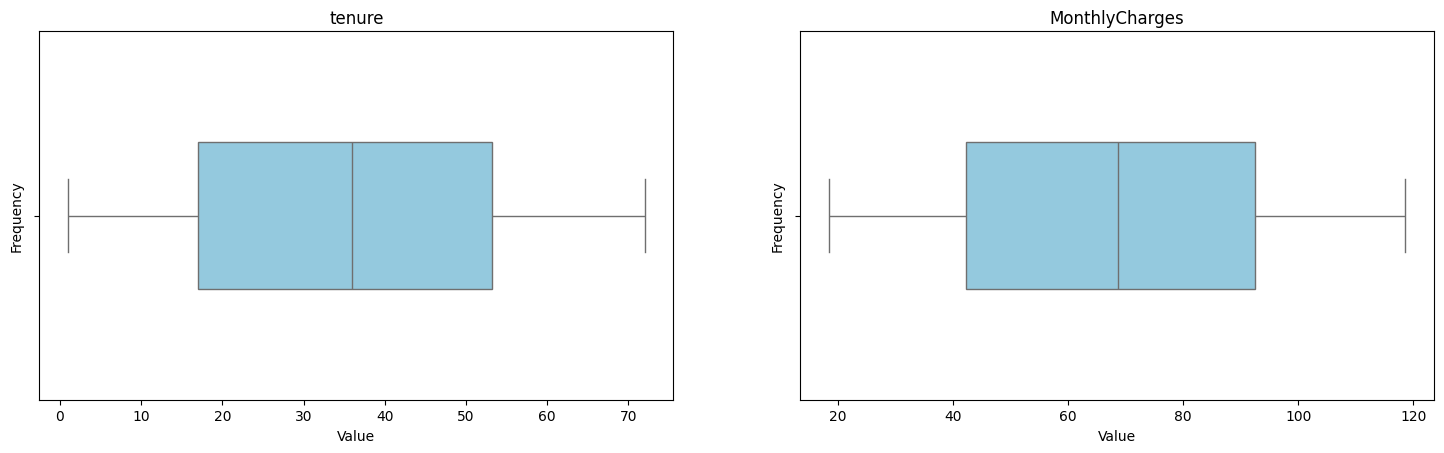

In [145]:
import seaborn as sns
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['tenure','MonthlyCharges']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=data[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')


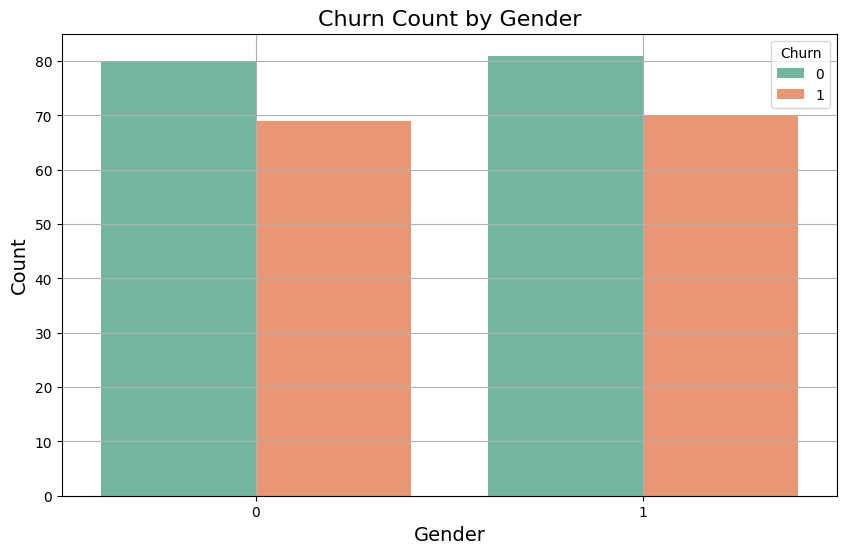

In [146]:
# Churn Count by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=data, palette='Set2')
plt.title('Churn Count by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()


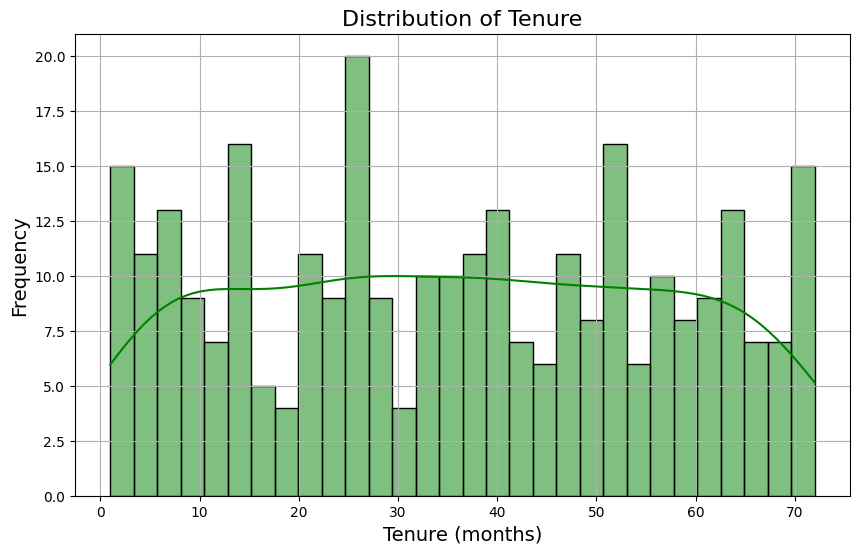

In [147]:
# Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data['tenure'], bins=30, kde=True, color='green')
plt.title('Distribution of Tenure', fontsize=16)
plt.xlabel('Tenure (months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

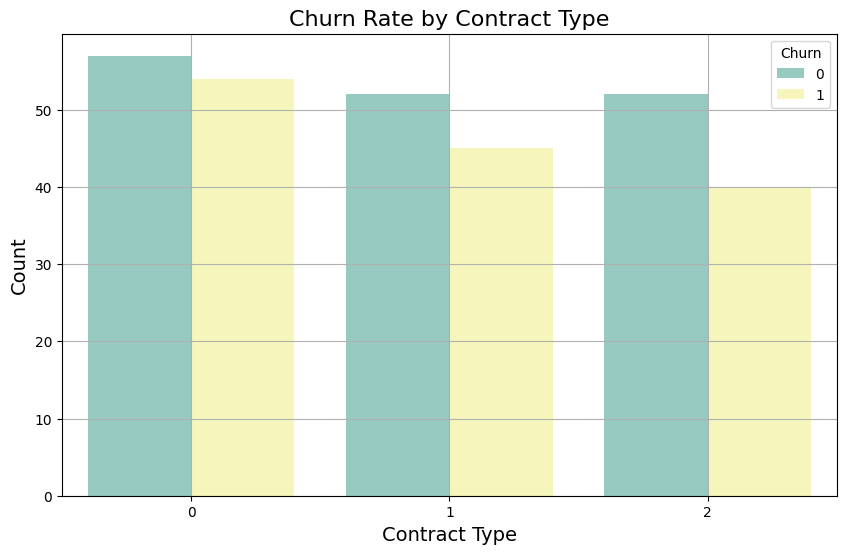

In [148]:
# Churn Rate by Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set3')
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()

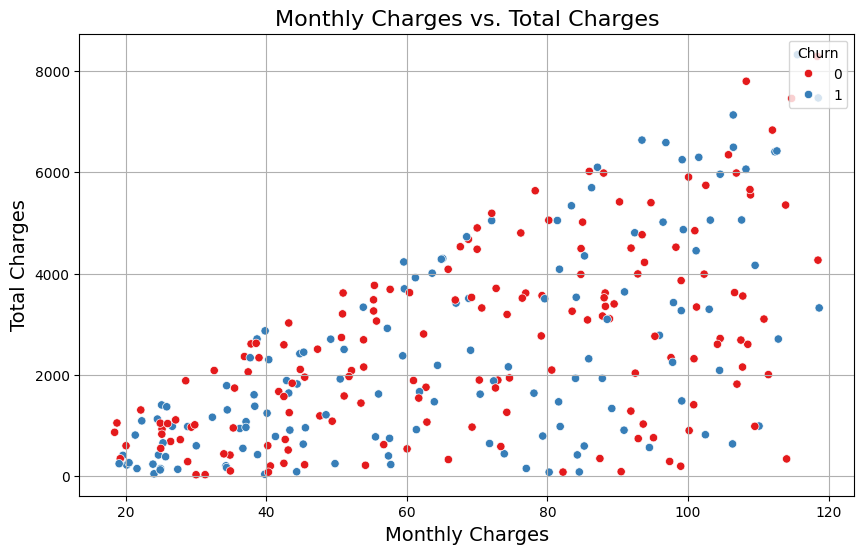

In [149]:
# Monthly Charges vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data, palette='Set1')
plt.title('Monthly Charges vs. Total Charges', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Total Charges', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()


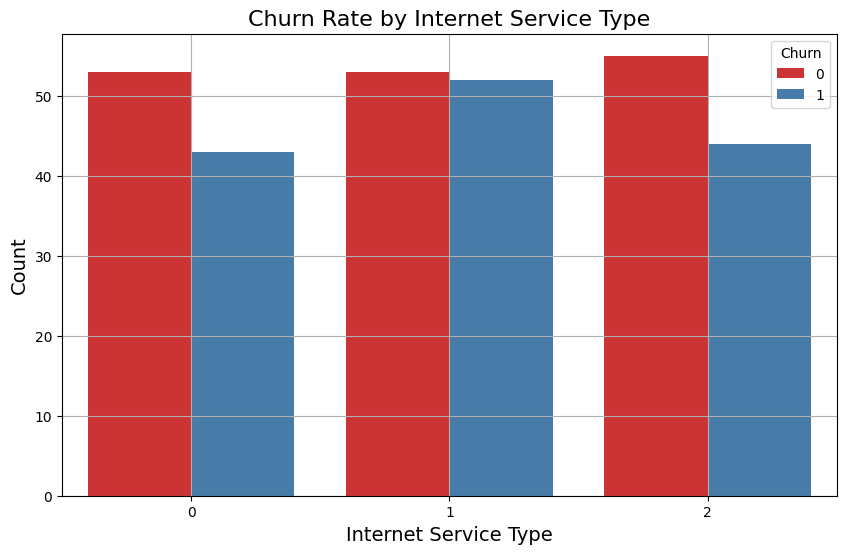

In [150]:
# Churn Rate by Internet Service Type
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=data, palette='Set1')
plt.title('Churn Rate by Internet Service Type', fontsize=16)
plt.xlabel('Internet Service Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()

### 4. Modelling

In [151]:
cols = ['TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [152]:
data[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TechSupport       300 non-null    int64  
 1   StreamingTV       300 non-null    int64  
 2   StreamingMovies   300 non-null    int64  
 3   Contract          300 non-null    int64  
 4   PaperlessBilling  300 non-null    int64  
 5   PaymentMethod     300 non-null    int64  
 6   MonthlyCharges    300 non-null    float64
 7   TotalCharges      300 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [153]:
df = data[cols]
df["Churn"] = data['Churn']

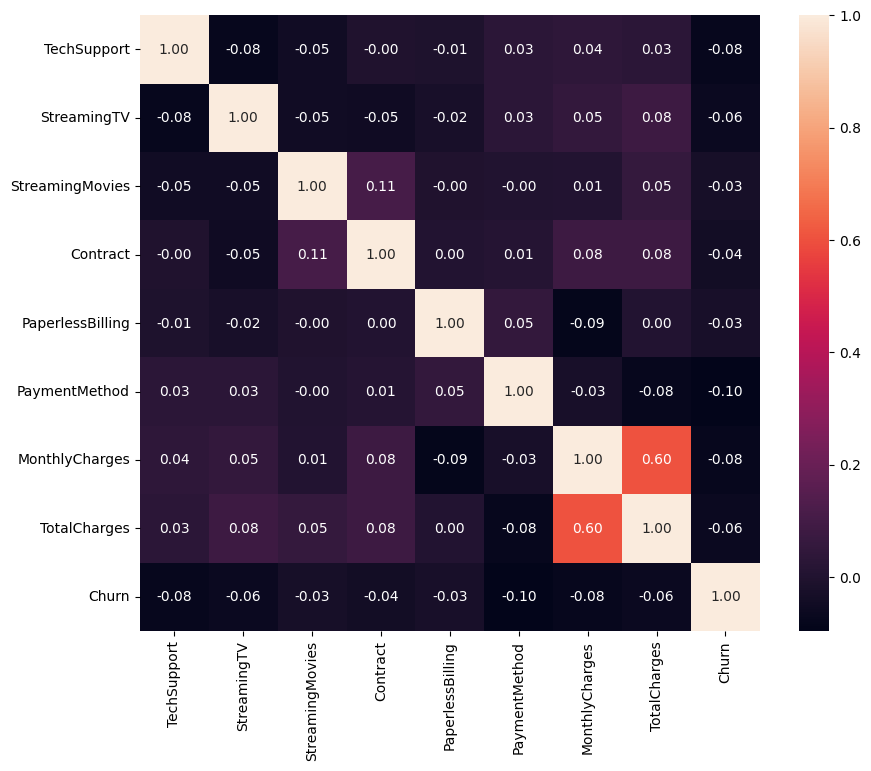

In [154]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data[cols]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [156]:
y_train.value_counts()

Churn
0    129
1    111
Name: count, dtype: int64

In [157]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'DecisionTreeClassifier':DecisionTreeClassifier()
}

# Initialize results DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall Score', 'F1 Score', 'ROC AUC Score'])

# Loop through each model
for name, model in models.items():
    print(f"Model: {name}")
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test)
    
    # Print classification report and confusion matrix
    print(classification_report(y_test, y_pred), '\n')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred), '\n')
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred)
    
    # Compute ROC AUC Score if applicable
    roc_auc = None
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Print results
    print(f"Accuracy Score: {accuracy}")
    print(f"Recall Score: {recall}")
    print(f"F1 Score: {f1}")
    if roc_auc is not None:
        print(f"ROC AUC Score: {roc_auc}")
    
    # Append results to DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': name, 
        'Accuracy': accuracy, 
        'Recall Score': recall, 
        'F1 Score': f1, 
        'ROC AUC Score': roc_auc
    }])], ignore_index=True)
    
    print("-" * 50, '\n')

# Display final results
print(results_df)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.53      1.00      0.70        32
           1       0.00      0.00      0.00        28

    accuracy                           0.53        60
   macro avg       0.27      0.50      0.35        60
weighted avg       0.28      0.53      0.37        60
 

Confusion Matrix:
[[32  0]
 [28  0]] 

Accuracy Score: 0.5333333333333333
Recall Score: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5580357142857143
-------------------------------------------------- 

Model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.33      0.22      0.26        32
           1       0.36      0.50      0.42        28

    accuracy                           0.35        60
   macro avg       0.35      0.36      0.34        60
weighted avg       0.35      0.35      0.34        60
 

Confusion Matrix:
[[ 7 25]
 [14 14]] 

Accuracy Score: 0.35
Recall Score: 0.5
F1 Score: 0.41

In [158]:
results_df

,Model,Accuracy,Recall Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.533333,0.0,0.00000,0.558036
1,DecisionTreeClassifier,0.350000,0.5,0.41791,0.359375


In [159]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'DecisionTreeClassifier': {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [3, 4, 5, 6]
    }
}

# Ensure best_models is initialized
best_models = {}

# Run Hyperparameter Tuning
for name, model in models.items():
    print(f"🔍 Tuning {name}...")
    
    search = GridSearchCV(model, param_grid.get(name, {}), cv=3, scoring='f1', n_jobs=-1)
    search.fit(X_train_scaled, y_train)
    
    best_models[name] = search.best_estimator_
    print(f"✅ Best Parameters for {name}: {search.best_params_}\n")



### 🔹 **Evaluating All Models**

# Initialize DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 
                                   'ROC AUC Score'])

# Ensure best_models is used correctly
if not best_models:
    print("❌ Error: No best models found. Ensure hyperparameter tuning is completed.")

else:
    for name, model in best_models.items():
        print(f"Evaluating Model: {name}")
        
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        results_df = pd.concat([results_df, pd.DataFrame([{
            'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 
            'F1 Score': f1, 'ROC AUC Score': roc_auc
        }])], ignore_index=True)

    print("\n🔹 Final Evaluation Metrics 🔹")
    print(results_df)



        # Display confusion matrix


    print("-" * 50, '\n')

    print("-" * 50, '\n')


🔍 Tuning Logistic Regression...
✅ Best Parameters for Logistic Regression: {'C': 1}

🔍 Tuning DecisionTreeClassifier...
✅ Best Parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}

Evaluating Model: Logistic Regression
Evaluating Model: DecisionTreeClassifier

🔹 Final Evaluation Metrics 🔹
                    Model  Accuracy  Precision  Recall  F1 Score  \
0     Logistic Regression  0.533333   0.000000     0.0  0.000000   
1  DecisionTreeClassifier  0.466667   0.466667     1.0  0.636364   

   ROC AUC Score  
0       0.558036  
1       0.500000  
-------------------------------------------------- 

-------------------------------------------------- 



In [160]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.533333,0.000000,0.0,0.000000,0.558036
1,DecisionTreeClassifier,0.466667,0.466667,1.0,0.636364,0.500000
